<a href="https://colab.research.google.com/github/AnoVando/MSIS/blob/master/MSIS521_IA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import nltk
nltk.download('punkt') # tokenizer
nltk.download('wordnet') # lemmatizer
nltk.download('stopwords') # used to handle words like a, an, the
nltk.download('averaged_perceptron_tagger') # Part of Speech
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [38]:
url = 'https://github.com/AnoVando/MSIS/raw/master/IA2.csv'
data = pd.read_csv(url, header=None)
data.columns = ['index', 'comment']
data.head()

,index,comment
0,1,This is the place to go after this branch to t...
1,2,The direct delivery from Star Theater in Chian...
2,3,It is very delicious food. Good taste Unspoilt...
3,4,This house is the second time. I used to be a ...
4,5,Featured is majestic. Located on the road 107 ...


In [39]:
# iterate through the list and tokenize each comment
for row in data.comment:
  comments = nltk.word_tokenize(row)

print(comments)

['Some', 'of', 'Liu', 'Zhenyun', '’', 's', 'works', 'have', 'been', 'read', 'intermittently', '.', 'The', 'small', 'forest', 'in', 'the', '“', 'Unit', '”', 'and', '“', 'Chicken', 'of', 'the', 'Land', '”', 'grew', 'up', 'under', 'the', 'reform', 'and', 'opening', 'up', 'and', 'the', 'market', 'economy', '.', 'Many', 'historical', 'figures', 'in', 'the', '“', 'Hometown', '”', 'series', 'encircle', 'the', 'historical', 'reality', ',', 'nothing', 'more', 'than', 'Liu', 'Zhenyun', '’', 's', 'black', 'humor', '.', 'The', 'language', 'reveals', 'his', 'embarrassment', 'as', 'a', 'writer', '.', 'The', 'characters', 'are', 'not', 'important', '.', 'What', 'is', 'important', 'is', 'to', 'dispel', 'the', 'grand', 'narrative', 'in', 'the', 'historical', 'context', ',', 'to', 'defeat', 'the', 'tall', 'and', 'complete', ',', 'and', 'to', 'return', 'a', 'real', 'name', 'to', 'the', 'world', '.', 'In', 'Liu', 'Zhenyun', '&', '#', '39', ';', 's', 'works', ',', 'you', 'can', 'almost', 'see', 'too', 'man

In [40]:
# Perform lemmatization on all of the words in the comments

lemmatizer = nltk.stem.WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(token) for token in comments if token.isalpha()]
print(lemmatized)

['Some', 'of', 'Liu', 'Zhenyun', 's', 'work', 'have', 'been', 'read', 'intermittently', 'The', 'small', 'forest', 'in', 'the', 'Unit', 'and', 'Chicken', 'of', 'the', 'Land', 'grew', 'up', 'under', 'the', 'reform', 'and', 'opening', 'up', 'and', 'the', 'market', 'economy', 'Many', 'historical', 'figure', 'in', 'the', 'Hometown', 'series', 'encircle', 'the', 'historical', 'reality', 'nothing', 'more', 'than', 'Liu', 'Zhenyun', 's', 'black', 'humor', 'The', 'language', 'reveals', 'his', 'embarrassment', 'a', 'a', 'writer', 'The', 'character', 'are', 'not', 'important', 'What', 'is', 'important', 'is', 'to', 'dispel', 'the', 'grand', 'narrative', 'in', 'the', 'historical', 'context', 'to', 'defeat', 'the', 'tall', 'and', 'complete', 'and', 'to', 'return', 'a', 'real', 'name', 'to', 'the', 'world', 'In', 'Liu', 'Zhenyun', 's', 'work', 'you', 'can', 'almost', 'see', 'too', 'many', 'postmodernist', 'technique', 'rather', 'than', 'the', 'pure', 'modernity', 'of', 'the', 'sorrowful', 'magical',

In [41]:
# Remove all of the stop works and punctuation

stop_words_removed = [token for token in lemmatized if not token in stopwords.words('english')]
print(stop_words_removed)

['Some', 'Liu', 'Zhenyun', 'work', 'read', 'intermittently', 'The', 'small', 'forest', 'Unit', 'Chicken', 'Land', 'grew', 'reform', 'opening', 'market', 'economy', 'Many', 'historical', 'figure', 'Hometown', 'series', 'encircle', 'historical', 'reality', 'nothing', 'Liu', 'Zhenyun', 'black', 'humor', 'The', 'language', 'reveals', 'embarrassment', 'writer', 'The', 'character', 'important', 'What', 'important', 'dispel', 'grand', 'narrative', 'historical', 'context', 'defeat', 'tall', 'complete', 'return', 'real', 'name', 'world', 'In', 'Liu', 'Zhenyun', 'work', 'almost', 'see', 'many', 'postmodernist', 'technique', 'rather', 'pure', 'modernity', 'sorrowful', 'magical', 'realism', 'quot', 'hometown', 'circulate', 'quot', 'six', 'finger', 'excess', 'finger', 'set', 'bridge', 'let', 'Hundreds', 'thousand', 'immigrant', 'Yanjin', 'people', 'successfully', 'crossed', 'Yellow', 'River', 'In', 'new', 'historicalism', 'quot', 'Hometown', 'Yellow', 'Flower', 'quot', 'village', 'committee', 'cadr

In [42]:
# Generate TF-IDF Vectors

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3)
vectorizer.fit(stop_words_removed)

vector = vectorizer.transform(stop_words_removed)


print(vector.toarray())
print('\n')
print(vectorizer.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


{'liu': 13, 'zhenyun': 29, 'the': 22, 'small': 21, 'forest': 3, 'unit': 24, 'chicken': 1, 'historical': 5, 'hometown': 7, 'series': 20, 'nothing': 15, 'language': 10, 'writer': 26, 'narrative': 14, 'real': 19, 'in': 8, 'quot': 18, 'thousand': 23, 'people': 16, 'yellow': 28, 'like': 12, 'history': 6, 'ha': 4, 'it': 9, 'everyone': 2, 'life': 11, 'change': 0, 'power': 17, 'year': 27, 'wa': 25}


In [43]:
# Tag each word from output one with Part of Speech

comments

POS = []
for comment in comments:
    tokens = nltk.word_tokenize(comment) # tokenize the words
    POS_tokens = nltk.pos_tag(tokens) # pos tag the tokens
    POS_token_temp = []
    for i in POS_tokens:
        POS_token_temp.append(i[0] + i[1]) # create tuples for the tokens/pos tags
    POS.append(" ".join(POS_token_temp))

vectorizer2 = TfidfVectorizer()
vectorizer2.fit(POS)
print(vectorizer2.vocabulary_)

print('\n')

POS_2 = vectorizer2.transform(POS)
print(POS_2.toarray())

{'somedt': 280, 'ofin': 208, 'liunn': 167, 'zhenyunnn': 356, 'nn': 199, 'snn': 277, 'worksnns': 344, 'havevb': 118, 'beenvbn': 25, 'readnn': 239, 'intermittentlyrb': 145, 'thedt': 303, 'smalljj': 275, 'forestnn': 95, 'inin': 143, 'unitnn': 321, 'andcc': 14, 'chickennn': 45, 'landnn': 154, 'grewvbd': 111, 'uprb': 324, 'underin': 319, 'reformnn': 245, 'openingnn': 215, 'marketnn': 177, 'economynn': 69, 'manyjj': 176, 'historicaljj': 129, 'figuresnns': 86, 'hometownnnp': 132, 'seriesnn': 268, 'encirclenn': 72, 'realitynn': 243, 'nothingnn': 201, 'morerbr': 189, 'thanin': 301, 'blackjj': 30, 'humornn': 136, 'languagenn': 155, 'revealsnns': 254, 'hisprp': 127, 'embarrassmentnn': 70, 'asin': 17, 'adt': 6, 'writernn': 347, 'charactersnns': 44, 'arevbp': 16, 'notrb': 202, 'importantjj': 141, 'whatwp': 338, 'isvbz': 149, 'toto': 313, 'dispelnn': 64, 'grandjj': 109, 'narrativejj': 193, 'contextnn': 52, 'defeatnn': 58, 'tallnn': 295, 'completejj': 51, 'returnnn': 253, 'realjj': 244, 'namenn': 192

Part 2

1. Read in all of the 10 images in python, resize each of them a 100 by 100 pixels format.
2. Convert them to greyscale arrays (no color information needs to be kept, so the arrays will be 2‐
D).
3. Flatten the 2‐D array to a 1‐D array (vectors), draw a histogram to present the intensity value
distribution of all of the images.
4. Conduct a histogram equalization to normalize the images, draw a histogram to present the
intensity value distribution of all of the images after the normalization.
5. Compare the histogram in step 4 with step 3, discuss what the difference is.
Tips: you may consider using a “for loop” for step 1 to step 3, so you could process the whole
collection at once.

In [0]:
from google.colab import files
import os
import numpy as np
from PIL import Image
from pylab import *

In [0]:
images = [] # initialize a list to store the images arrays

# for loop to grab all of the files from the current working directory
for im_path in os.listdir():
  # grabbing all PNG files
  if im_path.endswith(".PNG"):
      #reading in the images
      im = Image.open(im_path)
      #converting them to grayscale
      im = im.convert('L')
      #resizing them to 100 x 100 pixels
      im = np.resize(im,(100,100,3))
      #flattening the 2D array to a 1D array
      im = im.flatten()
      #appending the image arrays to the list i initiated earlier
      images.append(im)


([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   5.,   8.,
          16.,  14.,  32.,  30.,  47.,  66.,  94., 119., 134., 149., 190.,
         231., 322., 288., 374., 379., 438., 478., 448., 445., 366., 356.,
         373., 360., 358., 344., 307., 293., 311., 288., 281., 276., 234.,
         219., 236., 227., 227., 228., 204., 216., 198., 175., 157., 198.,
         167., 170., 152., 178., 167., 169., 169., 151., 162., 158., 160.,
         185., 173., 132., 156., 163., 150., 164., 151., 127., 140., 127.,
         123., 129., 102., 109.,  80., 110.,  87.,  88.,  70.,  80.,  75.,
          72.,  68.,  58.,  55.,  62.,  36.,  41.,  27.,  27.,  35.,  41.,
          34.,  26.,  24.,  30.,  27.,  37.,  33.,  25.,  29.,  24.,  27.,
          25.,  23.,  20.,  24.,  26.,  23.,  30.,  29.,  22.,  15.,  15.,
          14.,  15.,  11.

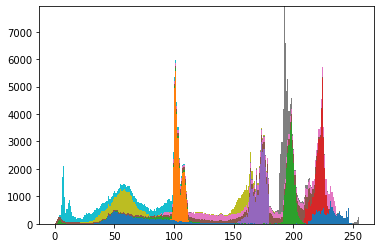

In [68]:
# plotting the image arrays in a histogram with 256 bins
plt.hist(images,bins=255,stacked=True)